## Importando bibliotecas
 Pandas para manipulação de dados e Matplotlib para gerar gráficos que representem os resultados

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do dataset
 Transformando a tabela para o dataframe e guadando na variável df

In [29]:
df = pd.read_csv('../dataset/mobile_device_usage.csv')
df.head()   # método head mostra as 5 primeiras linhas do meu dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Entendendo meu dataset
 O DataSet parece estar correto, vou verificar seu tamanho, se há valores faltantes e a distribuição das colunas

In [30]:
df.shape    # Quantidade de linhas x colunas

(700, 11)

In [31]:
df.isna().any() # Checo se existe algum valor nulo

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

In [16]:
df.info()   # Vendo os tipos de dados das colunas do DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Análise da distribuição das colunas para verificar se há valores muito discrepantes (possíveis outliers)

In [17]:
df.describe()   # Informações sobre o meu dado agregado (para valores numéricos)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## Limpando meu dataset
 Deixando as colunas que são interessantes para a minha análise

 Observo que a primeira coluna "User ID" é redundante, e que a<br>
 coluna "User Behavior Class" não será usada no meu tratamento

 Vou reler o arquivo sem ela

In [32]:
df = df.drop(["User ID", "User Behavior Class"], axis = 1)    # Seleciono os títulos das colunas
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 49.3+ KB


## Gerando as visualizações

### Distribuição por sistema operacional

In [20]:
# Contar ocorrências de cada sistema operacional
os_counts = df["Operating System"].value_counts()
os_counts

Operating System
Android    554
iOS        146
Name: count, dtype: int64

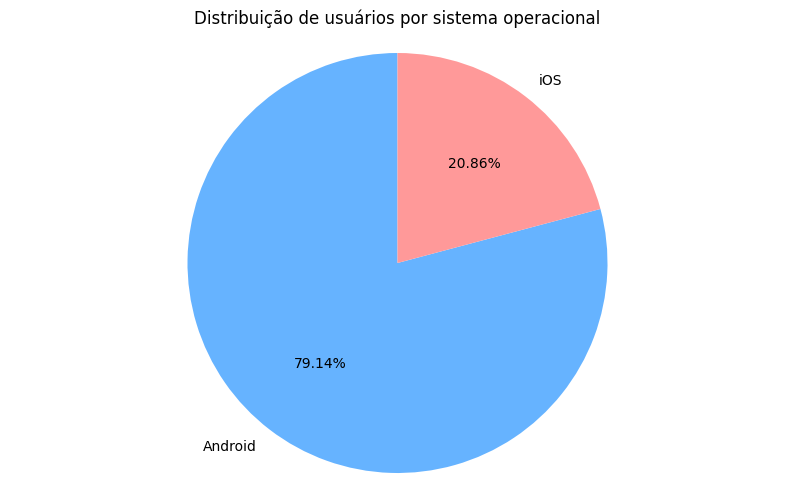

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.pie( # Configura o gráfico de pizza
    os_counts.values,
    labels = os_counts.index,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = ["#66b3ff", "#ff9999"]
)

# Personalizar o gráfico
ax.axis('equal')    # Corrige o formato para um círculo
plt.title("Distribuição de usuários por sistema operacional")

plt.show()

### Média de consumo de bateria por dispositivo

In [22]:
# Calcular a média do consumo de bateria por modelo
battery_drain_avg = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()
battery_drain_avg.describe()

,Battery Drain (mAh/day)
count,5.000000
mean,1524.497504
std,41.914452
min,1475.676056
25%,1504.571429
50%,1523.849624
75%,1528.876712
max,1589.513699


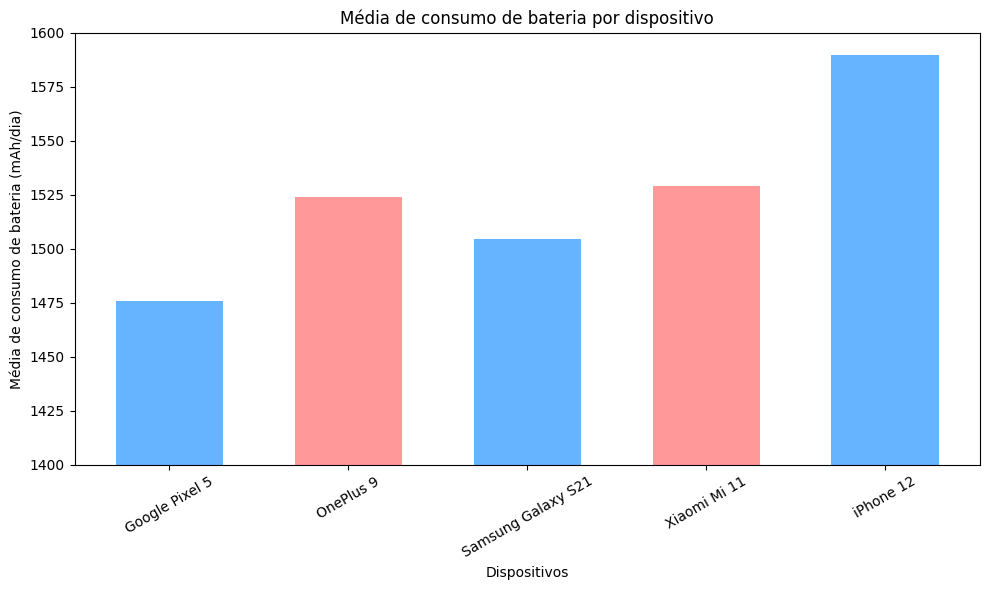

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    battery_drain_avg['Device Model'], 
    battery_drain_avg['Battery Drain (mAh/day)'], 
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)
# Personalizar o gráfico
plt.title("Média de consumo de bateria por dispositivo")
plt.xlabel("Dispositivos")
plt.ylabel("Média de consumo de bateria (mAh/dia)")
ax.set_ylim([1400, 1600])   # Ajusta o intervalo do eixo y
plt.xticks(rotation=30) # Rotaciona os rótulos para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Tempo de tela médio por idade

In [24]:
# Calcular a média de idade de pessoas por tempo de tela
age_screen_time_avg = df.groupby('Age')['Screen On Time (hours/day)'].mean().reset_index()
age_screen_time_avg.describe()

,Age,Screen On Time (hours/day)
count,42.000000,42.000000
mean,38.500000,5.248213
std,12.267844,0.657702
min,18.000000,4.294118
25%,28.250000,4.732955
50%,38.500000,5.237179
75%,48.750000,5.554699
max,59.000000,6.870588


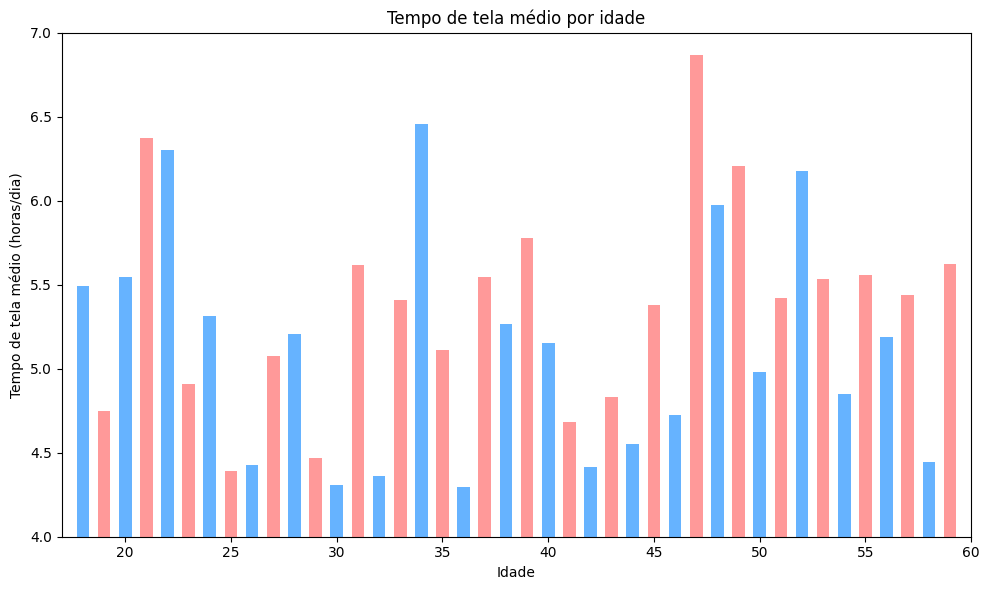

In [25]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    age_screen_time_avg['Age'],
    age_screen_time_avg['Screen On Time (hours/day)'],
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)

# Personalizar o gráfico
plt.title("Tempo de tela médio por idade")
plt.xlabel("Idade")
plt.ylabel("Tempo de tela médio (horas/dia)")
ax.set_xlim([17, 60])   # Ajusta o intervalo do eixo x
ax.set_ylim([4, 7])   # Ajusta o intervalo do eixo y
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Tempo de tela médio por gênero

In [26]:
# Calcular a média do tempo de tela por gênero
gender_screen_time_avg = df.groupby('Gender')['Screen On Time (hours/day)'].mean().reset_index()
gender_screen_time_avg.describe()

,Screen On Time (hours/day)
count,2.000000
mean,5.272276
std,0.015508
min,5.261310
25%,5.266793
50%,5.272276
75%,5.277759
max,5.283242


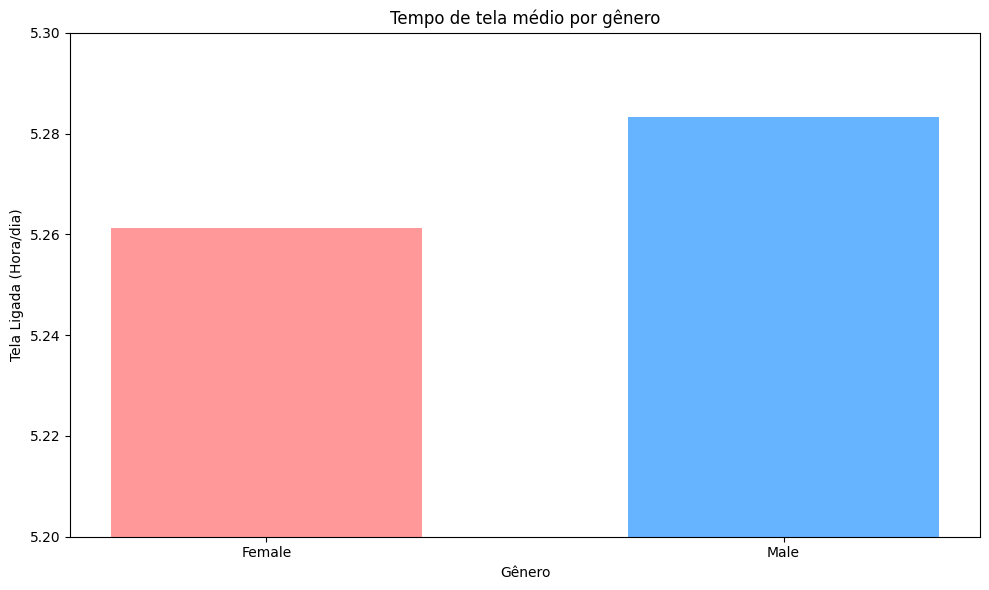

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    gender_screen_time_avg['Gender'],
    gender_screen_time_avg['Screen On Time (hours/day)'],
    color = ['#ff9999', '#66b3ff'],
    width = 0.6
)

# Personalizar o gráfico
plt.title("Tempo de tela médio por gênero")
plt.xlabel("Gênero")
plt.ylabel("Tela Ligada (Hora/dia)")
ax.set_ylim([5.2, 5.3])   # Ajusta o intervalo do eixo y
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Tempo de tela médio por faixa etária

In [37]:
# Configuração dos filtros de idade
df_filtered_1 = df[df['Age'] <= 20]
df_filtered_2 = df[(df['Age'] > 20) & (df['Age'] <= 30)]
df_filtered_3 = df[(df['Age'] > 30) & (df['Age'] <= 40)]
df_filtered_4 = df[(df['Age'] > 40) & (df['Age'] <= 50)]
df_filtered_5 = df[(df['Age'] > 50)]

In [38]:
# Calcular a média do tempo de tela para cada filtro de idade
mean_filtered_1 = df_filtered_1['Screen On Time (hours/day)'].mean()
mean_filtered_2 = df_filtered_2['Screen On Time (hours/day)'].mean()
mean_filtered_3 = df_filtered_3['Screen On Time (hours/day)'].mean()
mean_filtered_4 = df_filtered_4['Screen On Time (hours/day)'].mean()
mean_filtered_5 = df_filtered_5['Screen On Time (hours/day)'].mean()

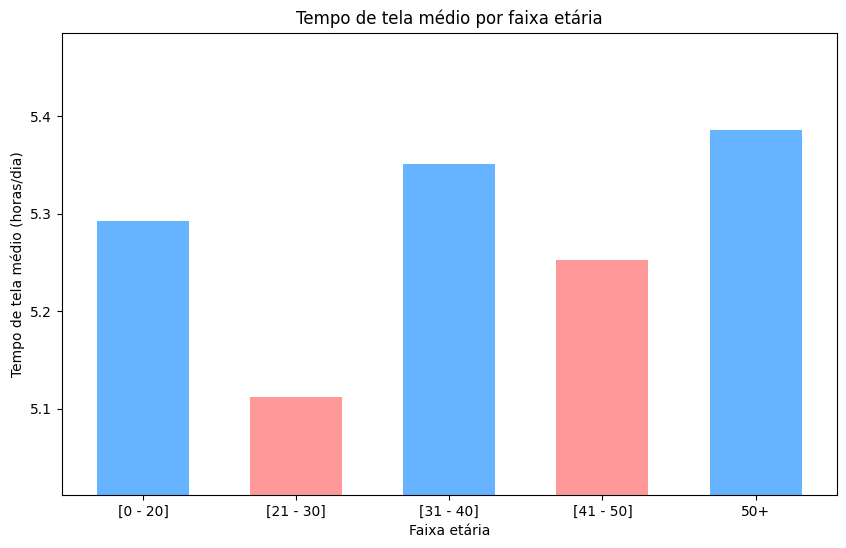

In [ ]:
# Definição dos eixos do gráfico
x = ['[0 - 20]', '[21 - 30]', '[31 - 40]', '[41 - 50]', '50+']
y = [
    mean_filtered_1,
    mean_filtered_2,
    mean_filtered_3,
    mean_filtered_4,
    mean_filtered_5
]
y = [0 if pd.isna(val) else val for val in y]   # Substitui NaN por 0

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    x,
    y,
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)

# Personalizar o gráfico
plt.title('Tempo de tela médio por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Tempo de tela médio (horas/dia)')
ax.set_ylim([min(y) - 0.1, max(y) + 0.1])   # Ajusta o intervalo do eixo y

plt.show()